In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2

## Read BGI input

## Combine info separetely

In [28]:
# input BGI 
bgi = pd.read_csv('input/ReadsNumb_BGI.csv')
bgi['sample_name'] = bgi['name'].str.split('_').str[1]
bgi.rename(columns={"name": "BGI_reads_file", "reads_numb": "BGI_reads_numb"}, inplace=True)
bgi = bgi.sort_values(by=['BGI_reads_numb'])
bgi_unique = bgi.drop_duplicates(subset=['sample_name'], keep='last')

# input BGI part 2
bgi2 = pd.read_csv('input/ReadsNumb_BGI_p2.csv', sep=' ', header=None, names=['Sample', 'BGIp2_reads_numb'])
bgi2['sample_name'] = bgi2['Sample'].str.split('_').str[0]
bgi2 = bgi2.sort_values(by=['BGIp2_reads_numb'])
bgi2_unique = bgi2.drop_duplicates(subset=['sample_name'], keep='last')
bgi2_unique = bgi2_unique[['sample_name','BGIp2_reads_numb']]

# input Illumina
#ill = pd.read_csv('input/ReadsNumb_Illumina.csv')
ill = pd.read_csv('input/ReadsNumb_Illumina.csv', sep=';')
ill.rename(columns={"nameS": "sample_name", "reads_numb": "Illumina_reads_numb"}, inplace=True)
ill = ill.sort_values(by=['Illumina_reads_numb'])
ill_unique = ill.drop_duplicates(subset=['sample_name'], keep='last')

# merge
rn = bgi_unique.merge(ill_unique, on='sample_name', how='outer')
rn1 = rn.merge(bgi2_unique, on='sample_name', how='outer')

rn1 = rn1[['sample_name', 'BGI_reads_numb', 'BGIp2_reads_numb', 'Illumina_reads_numb']]
rn1.to_excel('results/ReadsNumb_both_sets.xlsx', index=False)

rn1.head()

,sample_name,BGI_reads_numb,BGIp2_reads_numb,Illumina_reads_numb
0,V9OLUV,463900.0,NaN,623330.0
1,VNB54O,840010.0,NaN,16074287.0
2,VV5SGU,1013097.0,NaN,621436.0
3,VORP1W,19993536.0,NaN,13233320.0
4,V3PRGW,20274738.0,NaN,14875113.0


## Combine BGIs in one cohort 

In [5]:
## Combine info separetely
bgi_unique = bgi_unique.drop(columns=['BGI_reads_file'])
bgi2_unique.rename(columns={"BGIp2_reads_numb": "BGI_reads_numb"}, inplace=True)
# combine with bgi_unique
bgi_both = bgi_unique.append(bgi2_unique, ignore_index=True)
bgi_both

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_17241/3345486129.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bgi_both = bgi_unique.append(bgi2_unique, ignore_index=True)


,BGI_reads_numb,sample_name
0,463900,V9OLUV
1,840010,VNB54O
2,1013097,VV5SGU
3,19993536,VORP1W
4,20274738,V3PRGW
...,...,...
2010,83681271,V887SA
2011,86774991,VD7OX8
2012,87019548,V2ACZT
2013,91195072,VBV26Y


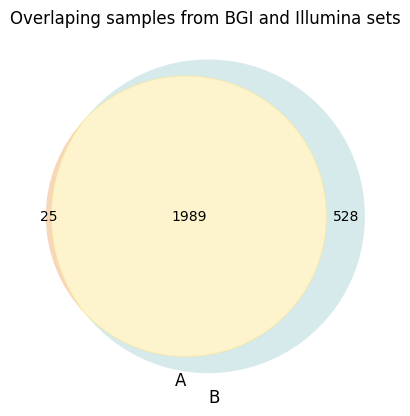

In [6]:
smpls_bgi = set(bgi_both['sample_name'])
#smpls_bgi = set(bgi_unique['sample_name']).union(bgi2_unique['sample_name'])

smpls_illumina = set(ill_unique['sample_name'])
intersection = smpls_bgi.intersection(smpls_illumina)
bgi_only = smpls_bgi.difference(smpls_illumina)
illumina_only = smpls_illumina.difference(smpls_bgi)

v = venn2(subsets=(len(bgi_only), len(illumina_only), len(intersection)), set_colors=('#E99B53', '#99CCCD'))
v.get_patch_by_id('11').set_color('#FAE483')
plt.title('Overlaping samples from BGI and Illumina sets')

plt.savefig('results/venn2.png', dpi=300, bbox_inches='tight')
plt.savefig('results/venn2.svg', bbox_inches='tight')


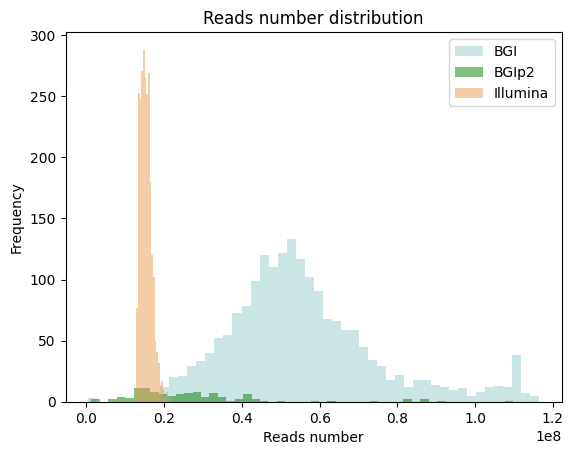

In [7]:
plt.hist(bgi_unique['BGI_reads_numb'], bins=50, color='#99CCCD', alpha=0.5, label='BGI')
plt.hist(bgi2_unique['BGI_reads_numb'], bins=50, color='green', alpha=0.5, label='BGIp2')
plt.hist(ill_unique['Illumina_reads_numb'], bins=50, color='#E99B53', alpha=0.5, label='Illumina')
plt.legend(loc='upper right')
plt.title('Reads number distribution')
plt.xlabel('Reads number')
plt.ylabel('Frequency')
plt.savefig('results/ReadsNumb_distribution.png', dpi=300, bbox_inches='tight')
plt.savefig('results/ReadsNumb_distribution.svg', bbox_inches='tight')

## Define duplicate samples

In [33]:
# rename column Sample 
bgi2.rename(columns={"Sample": "BGI_reads_file", "BGIp2_reads_numb": "BGI_reads_numb"}, inplace=True)
# combine with bgi_unique
bgi_both2 = bgi.append(bgi2, ignore_index=True)

# show duplicates for the sample column
bgi_dup = bgi_both2[bgi_both2.duplicated(['sample_name'], keep=False)].sort_values(by=['sample_name'])
bgi_dup.to_excel('results/BGI_duplicates.xlsx', index=False)

print('BGI cohort includes {} duplicated samples \n'.format(len(bgi_dup['sample_name'].unique())))
print(bgi_dup['sample_name'].value_counts().head(10))

BGI cohort includes 51 duplicated samples 

MB        3
V4SFLT    3
VA6KWA    2
VAOUIB    2
VB1IUF    2
VBW53L    2
VBY4LZ    2
VC1TRL    2
VCGAL2    2
VCM010    2
Name: sample_name, dtype: int64


/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_17241/3520219634.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bgi_both2 = bgi.append(bgi2, ignore_index=True)


In [31]:
# show duplicates for the sample column
ill_dup = ill[ill.duplicated(['sample_name'], keep=False)].sort_values(by=['sample_name'])
ill_dup.to_excel('results/Illumina_duplicates.xlsx', index=False)

print('Illumina cohort includes {} duplicated samples \n'.format(len(ill_dup['sample_name'].unique())))
print(ill_dup['sample_name'].value_counts())

Illumina cohort includes 7 duplicated samples 

VR4UUJ    4
V4SFLT    2
VF4AEO    2
VLD38Y    2
VRADL2    2
VRAZAX    2
VRRCD5    2
Name: sample_name, dtype: int64
